In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15, 10)

In [2]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

C:\Users\donvi\anaconda3\envs\ce2006\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
DF = pd.read_csv('4-room-flat-data.csv')
DF= DF.drop(['Unnamed: 0'],axis=1)
DF.head()

month        town flat_type block        street_name storey_range  \
0  2017-01  ANG MO KIO    4 ROOM   472  ANG MO KIO AVE 10     10 TO 12   
1  2017-01  ANG MO KIO    4 ROOM   475  ANG MO KIO AVE 10     07 TO 09   
2  2017-01  ANG MO KIO    4 ROOM   629   ANG MO KIO AVE 4     01 TO 03   
3  2017-01  ANG MO KIO    4 ROOM   546  ANG MO KIO AVE 10     01 TO 03   
4  2017-01  ANG MO KIO    4 ROOM   131   ANG MO KIO AVE 3     01 TO 03   

   floor_area_sqm      flat_model  lease_commence_date  remaining_lease  \
0            92.0  New Generation                 1979               61   
1            91.0  New Generation                 1979               61   
2            94.0  New Generation                 1981               63   
3            92.0  New Generation                 1981               63   
4            98.0  New Generation                 1979               61   

   resale_price  storey  town_premium  flat_model_premium  
0      400000.0      11       -3500.0            -55000.0  
1      400000.0       8       -3500.0            -55000.0  
2      403000.0       2       -3500.0            -55000.0  
3      410000.0       2       -3500.0            -55000.0  
4      425888.0       2       -3500.0            -55000.0

In [4]:
# y is the resale_price, target variable for our model
y = DF[['resale_price']]
y.head()

resale_price
0      400000.0
1      400000.0
2      403000.0
3      410000.0
4      425888.0

In [5]:
# x is the input variable that will be used to predict resale price. we have used almost all the data columns we have in dataset.
x = DF[['floor_area_sqm','lease_commence_date','remaining_lease','storey','town_premium','flat_model_premium']]

In [6]:
x.head()

floor_area_sqm  lease_commence_date  remaining_lease  storey  town_premium  \
0            92.0                 1979               61      11       -3500.0   
1            91.0                 1979               61       8       -3500.0   
2            94.0                 1981               63       2       -3500.0   
3            92.0                 1981               63       2       -3500.0   
4            98.0                 1979               61       2       -3500.0   

   flat_model_premium  
0            -55000.0  
1            -55000.0  
2            -55000.0  
3            -55000.0  
4            -55000.0

In [7]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2,random_state=4)

In [8]:
#double check the input data/ target variable size information. 
print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(44945, 6) (44945, 1)
(11237, 6) (11237, 1)


In [9]:
lm = linear_model.LinearRegression()
model = lm.fit(X_train, y_train)

In [10]:
predictions = lm.predict(X_test)

In [11]:
model.coef_

array([[ 1.93595070e+03,  1.87724225e+04, -1.63428783e+04,
         4.47172773e+03,  7.93657696e-01,  2.98851429e-01]])

Text(0, 0.5, 'Predictions')

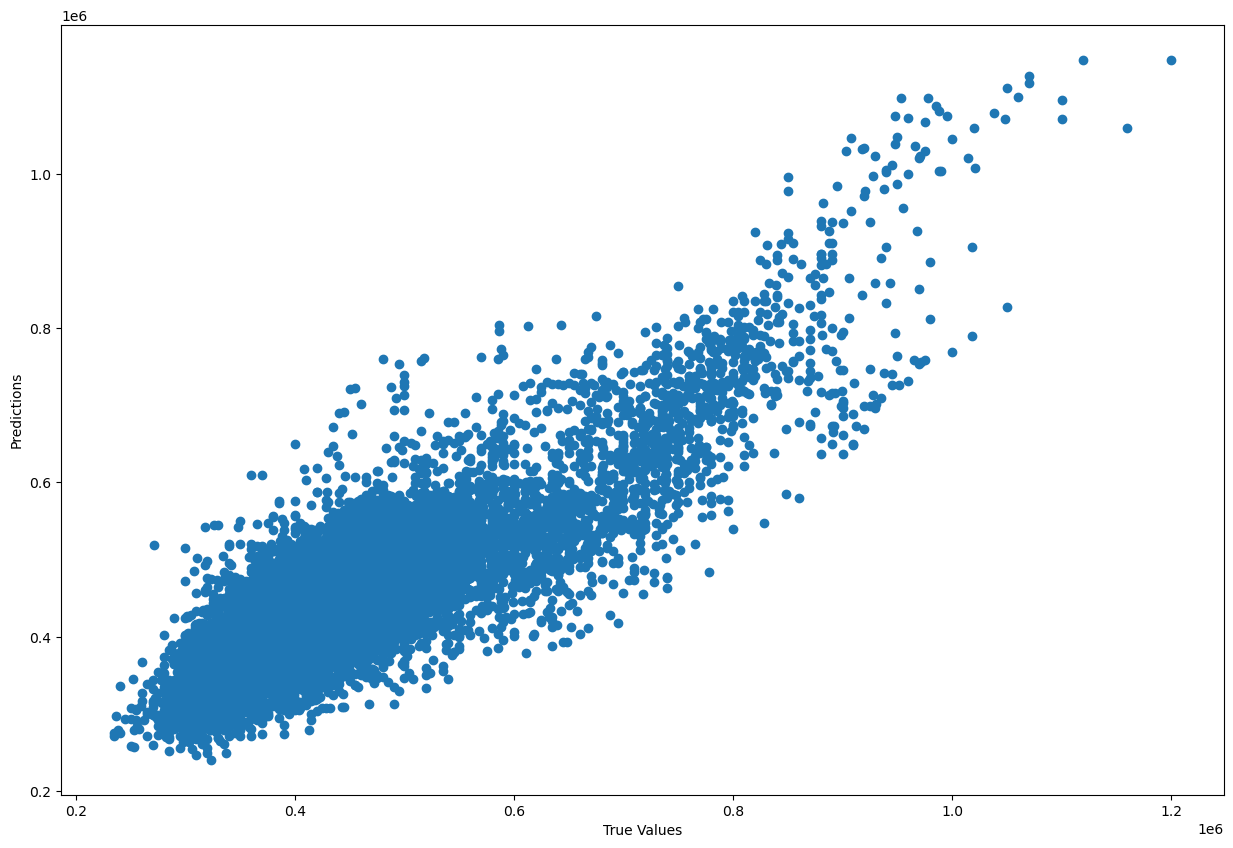

In [12]:
plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")

In [13]:

#Returns the coefficient of determination R^2 of the prediction.
print ("Score:", model.score(X_test, y_test))

Score: 0.7308679649656176


In [14]:
from sklearn import ensemble
clf2 = ensemble.GradientBoostingRegressor(n_estimators = 400, max_depth=5, min_samples_split = 2, learning_rate=0.1, 
                                          loss = 'squared_error')
clf2.fit(X_train,y_train)

C:\Users\donvi\anaconda3\envs\ce2006\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor(max_depth=5, n_estimators=400)

In [15]:
clf2.score(X_test,y_test)

0.9250541655507195

In [16]:
clf2.feature_importances_

array([0.0373249 , 0.35437896, 0.03874966, 0.04304235, 0.48521368,
       0.04129045])